In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df=pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df.info()
# print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [4]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

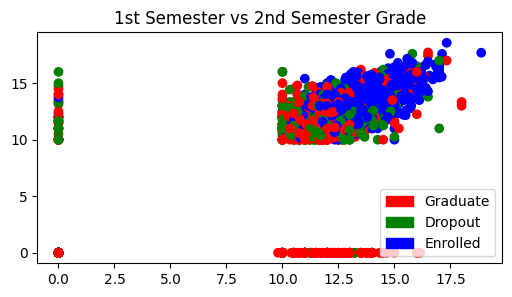

In [5]:
plt.figure(figsize=(6,3))
colors=np.array(['red','green','blue'])
red_patch=mpatches.Patch(color='red',label='Graduate' )
green_patch=mpatches.Patch(color='green',label='Dropout' )
blue_patch=mpatches.Patch(color='blue',label='Enrolled' )

plt.scatter( df["Curricular units 1st sem (grade)"],df["Curricular units 2nd sem (grade)"],c=colors[df['Target']])
plt.title("1st Semester vs 2nd Semester Grade")
plt.legend(handles =[red_patch,green_patch,blue_patch])

In [6]:
X = df.values[:, 0:34]
Y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[209  24  83]
 [ 21  33  97]
 [ 12   4 402]]
Accuracy :  72.7683615819209


0.3231638418079096
0.37175141242937854
0.31186440677966104
0.2903954802259887
0.29152542372881357
0.27796610169491526
0.28700564971751413
0.280225988700565
0.280225988700565
0.280225988700565
0.280225988700565
0.288135593220339
0.2858757062146893
0.27231638418079096
0.27570621468926554
0.28700564971751413
0.28135593220338984
0.2858757062146893
0.2824858757062147
0.28926553672316385
0.2937853107344633
0.296045197740113
0.2994350282485876
0.3016949152542373
0.2983050847457627
0.3016949152542373
0.30056497175141245
0.30056497175141245
0.2983050847457627
0.30056497175141245
0.296045197740113
0.2994350282485876
0.2994350282485876
0.29717514124293787
0.2937853107344633
0.2994350282485876
0.30056497175141245
0.296045197740113
0.2983050847457627


Text(0, 0.5, 'Mean Error')

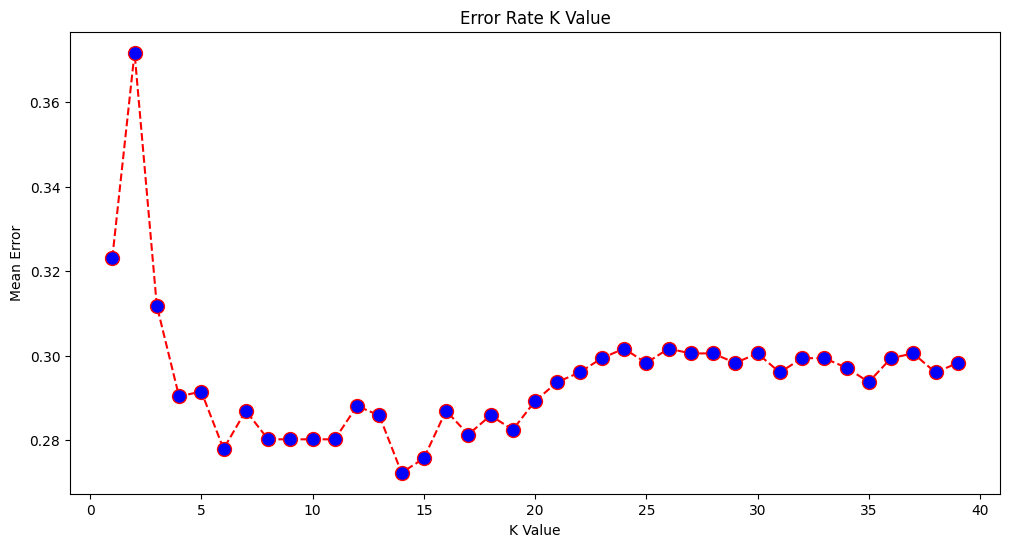

In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [10]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[203  36  77]
 [ 22  37  92]
 [ 14  11 393]]
Accuracy :  71.52542372881356


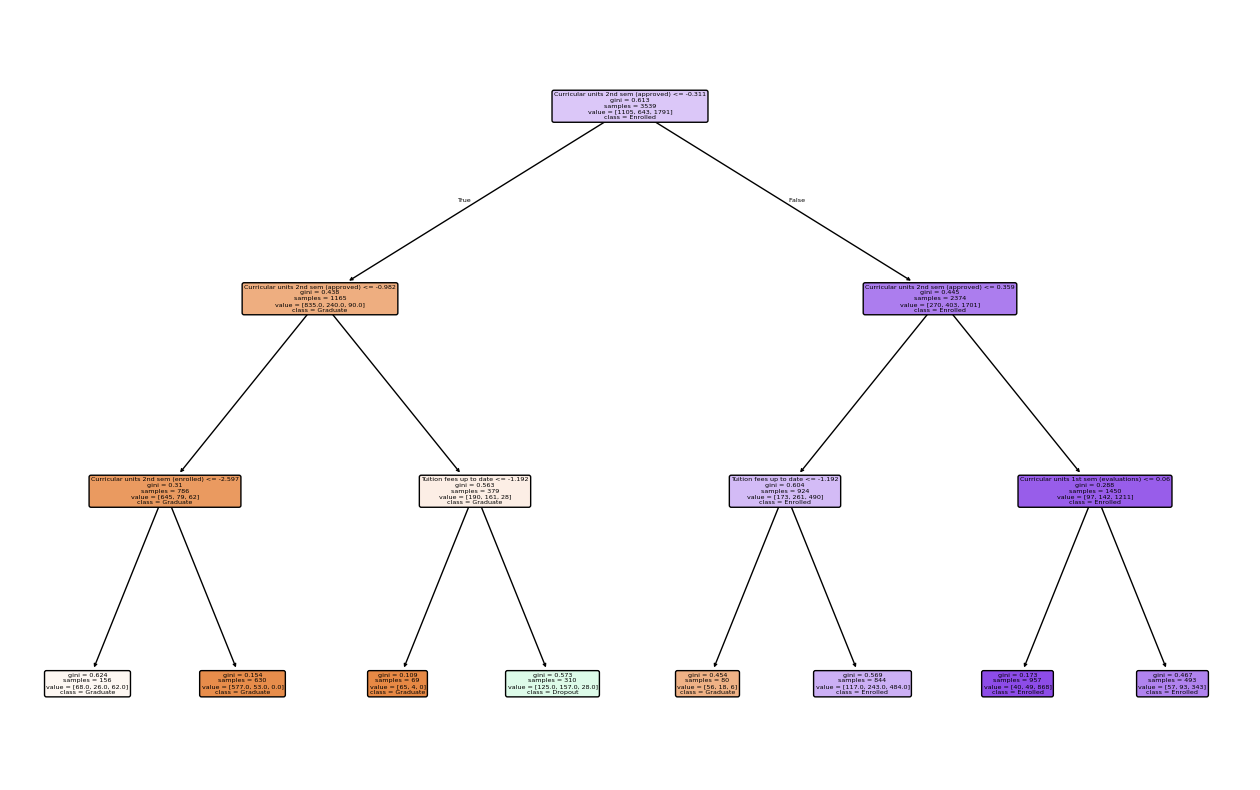

In [11]:
plt.figure(figsize=(16, 10))
tree.plot_tree(clf_gini, filled=True, feature_names=list(df.columns), class_names=['Graduate','Dropout','Enrolled'], rounded=True)
plt.show()

In [12]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[233   0  83]
 [ 57   0  94]
 [ 13   0 405]]
Accuracy :  72.090395480226


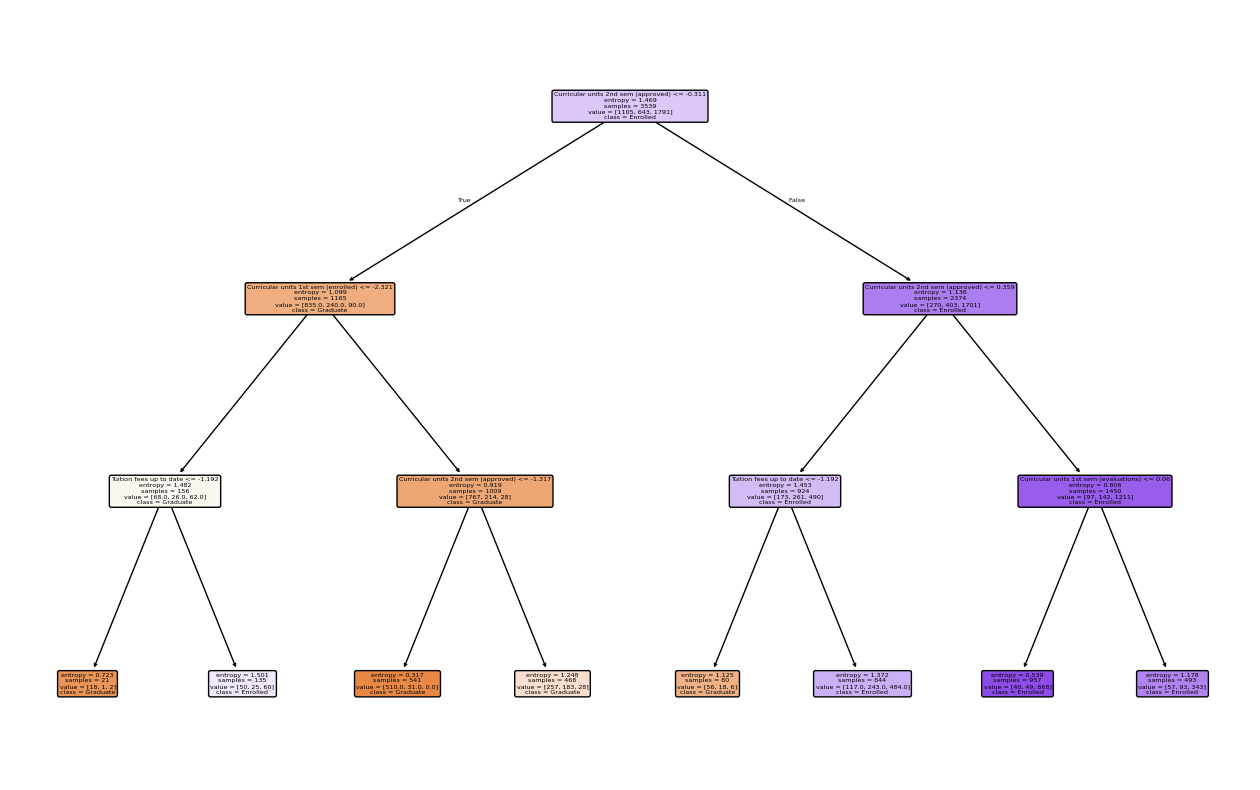

In [13]:
plt.figure(figsize=(16, 10))
tree.plot_tree(clf_entropy, filled=True, feature_names=list(df.columns), class_names=['Graduate','Dropout','Enrolled'], rounded=True)
plt.show()

In [14]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[234  33  49]
 [ 30  49  72]
 [  7  24 387]]
Accuracy :  75.70621468926554


In [15]:
ksvm_clf = svm.SVC(kernel='rbf', gamma=0.1, C=10.0)
ksvm_clf.fit(X_train, y_train)
y_pred = ksvm_clf.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[253  23  40]
 [ 42  43  66]
 [ 34  18 366]]
Accuracy :  74.80225988700565


In [16]:
import joblib

# Guarda el modelo entrenado
joblib.dump(svm_clf, 'svm_model.pkl')

['svm_model.pkl']